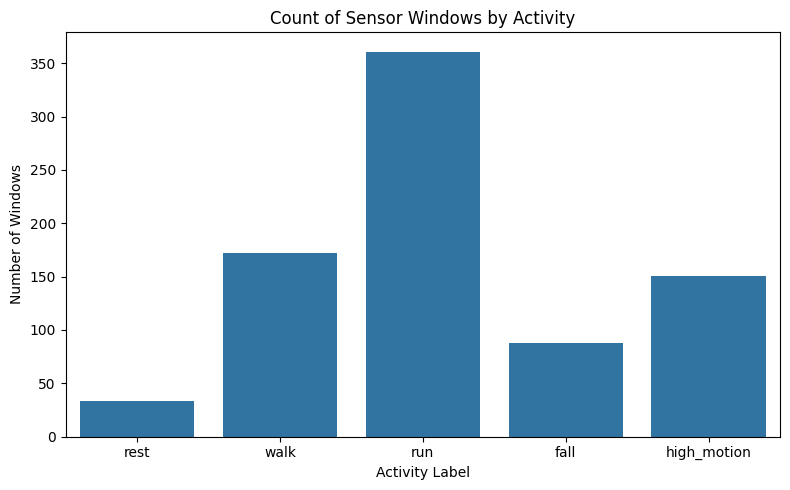

In [18]:
import pandas as pd                # For loading and working with tabular data
import matplotlib.pyplot as plt    # For making plots
import seaborn as sns              # For better-looking statistical plots

# Step 1: Load the CSV file into a DataFrame (table of data)
df = pd.read_csv('features_final_clean.csv')

# Step 2: Create a blank plot area that is 8 inches wide and 5 inches tall
plt.figure(figsize=(8, 5))

# Step 3: Draw a bar chart showing how many data windows belong to each activity
sns.countplot(
    data=df,      # Use the loaded data
    x='label'     # Count how many times each activity label appears
)

# Step 4: Add a title to the plot
plt.title('Count of Sensor Windows by Activity')

# Step 5: Label the x-axis
plt.xlabel('Activity Label')

# Step 6: Label the y-axis
plt.ylabel('Number of Windows')

# Step 7: Adjust layout to prevent overlapping text or cut-off labels
plt.tight_layout()

# Step 8: Show the finished chart
plt.show()


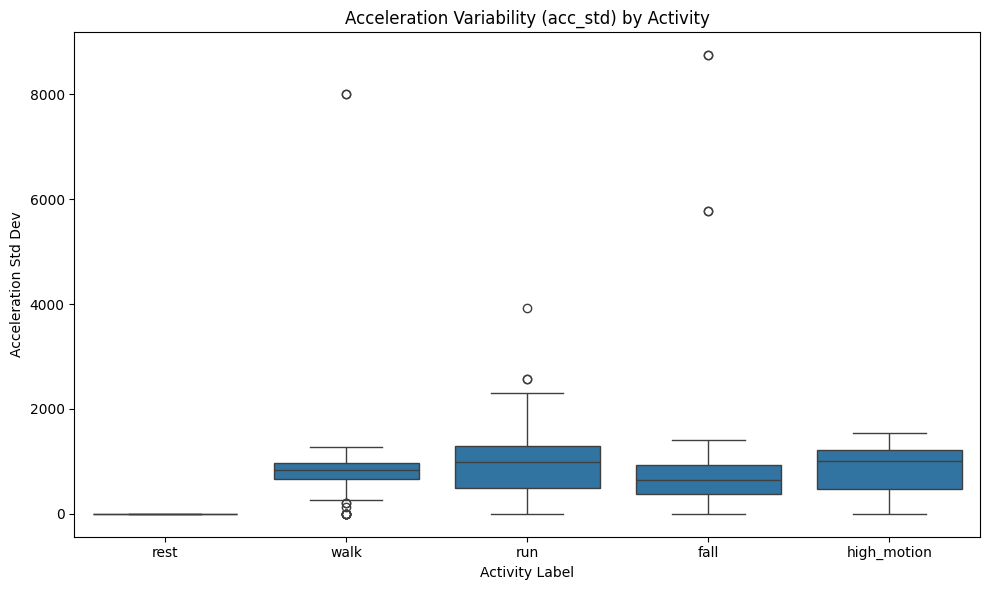

In [17]:
import pandas as pd                # Used to load and handle table-like data
import matplotlib.pyplot as plt    # Used for basic plotting
import seaborn as sns              # Used for advanced statistical visualizations

# Step 1: Load the dataset from the CSV file into a DataFrame (table)
df = pd.read_csv('features_final_clean.csv')

# Step 2: Create a new plot area (figure) that is 10 inches wide and 6 inches tall
plt.figure(figsize=(10, 6))

# Step 3: Draw a box plot to compare 'acc_std' (acceleration standard deviation)
# across different activity labels
sns.boxplot(
    data=df,         # The entire dataset
    x='label',       # Activity type on the x-axis (rest, walk, run, etc.)
    y='acc_std'      # Acceleration variability on the y-axis
)

# Step 4: Add a title to the plot
plt.title('Acceleration Variability (acc_std) by Activity')

# Step 5: Label the x-axis
plt.xlabel('Activity Label')

# Step 6: Label the y-axis
plt.ylabel('Acceleration Std Dev')

# Step 7: Automatically adjust spacing so nothing gets cut off
plt.tight_layout()

# Step 8: Show the final plot
plt.show()


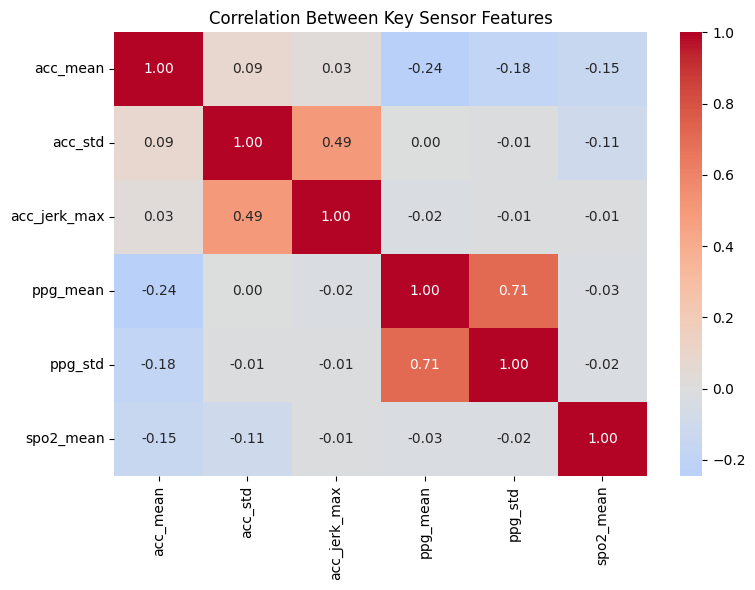

In [16]:
import pandas as pd                # To load and work with tabular data
import matplotlib.pyplot as plt    # For making basic plots
import seaborn as sns              # For prettier and advanced plots like heatmaps

# Step 1: Load the data from the CSV file into a table (DataFrame)
df = pd.read_csv('features_final_clean.csv')

# Step 2: Choose the specific features (columns) we want to check correlation for
features = [
    'acc_mean',       # Average acceleration (motion)
    'acc_std',        # Acceleration variability
    'acc_jerk_max',   # Biggest sudden change in motion
    'ppg_mean',       # Average pulse reading
    'ppg_std',        # Pulse signal variability
    'spo2_mean'       # Average oxygen level
]

# Step 3: Calculate how each pair of selected features are related
corr = df[features].corr()  # This creates a correlation matrix

# Step 4: Create a figure of size 8 inches by 6 inches
plt.figure(figsize=(8, 6))

# Step 5: Plot the heatmap using seaborn
sns.heatmap(
    corr,               # Use the correlation matrix
    annot=True,         # Show the correlation numbers in each box
    fmt=".2f",          # Keep only 2 decimal places
    cmap="coolwarm",    # Use blue-to-red color scale
    center=0            # Center the color scale around zero
)

# Step 6: Set a title for the heatmap
plt.title('Correlation Between Key Sensor Features')

# Step 7: Automatically adjust layout so nothing overlaps
plt.tight_layout()

# Step 8: Display the final heatmap
plt.show()


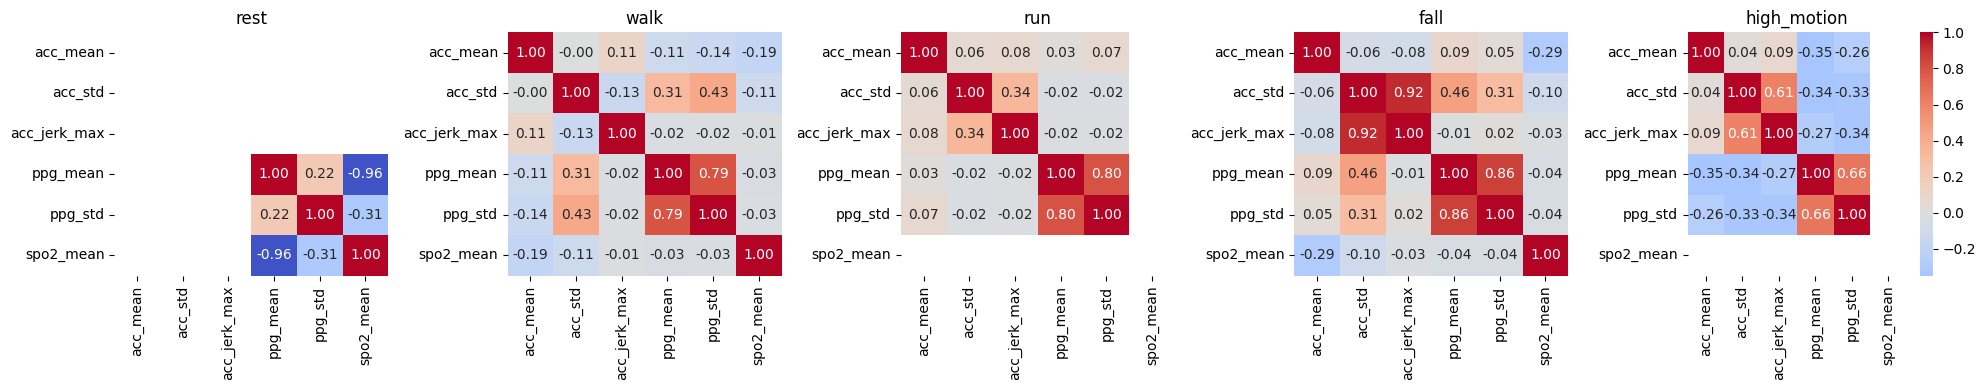

In [15]:
import pandas as pd                # For loading and managing data
import matplotlib.pyplot as plt    # For plotting
import seaborn as sns              # For advanced statistical visualizations

# Step 1: Load the data
df = pd.read_csv('features_final_clean.csv')  # Load the CSV file into a DataFrame

# Step 2: Select the numeric features we want to compare in each activity
features = [
    'acc_mean',       # Average acceleration
    'acc_std',        # Acceleration variability (standard deviation)
    'acc_jerk_max',   # Max sudden change in acceleration
    'ppg_mean',       # Average pulse value
    'ppg_std',        # Pulse variability
    'spo2_mean'       # Average blood oxygen level
]

# Step 3: Get all unique activity types (like 'walk', 'run', etc.)
labels = df['label'].unique()

# Step 4: Set up layout of subplots
n_rows = 1                   # We want just one row of plots
n_cols = len(labels)         # One column for each activity label
fig_width = 4 * n_cols       # Make each subplot about 4 inches wide
fig_height = 4               # Height is 4 inches

# Step 5: Create subplots with specified layout and size
fig, axes = plt.subplots(
    n_rows, 
    n_cols, 
    figsize=(fig_width, fig_height)  # Total size of the figure
)

# Step 6: Loop through each activity and draw a heatmap
for ax, lbl in zip(axes, labels):
    # Filter the data for the current activity label
    sub = df[df['label'] == lbl][features]
    
    # Compute correlation matrix between the selected features
    corr = sub.corr()
    
    # Draw the heatmap on the current subplot
    sns.heatmap(
        corr,               # The correlation matrix
        annot=True,         # Show the actual correlation values in the cells
        fmt=".2f",          # Format numbers to 2 decimal places
        cmap='coolwarm',    # Color scheme: blue for negative, red for positive
        center=0,           # Center the color scale at 0
        cbar=(ax == axes[-1]),  # Show the colorbar only on the last plot
        ax=ax               # Use the current subplot axis
    )
    
    # Set title for this subplot
    ax.set_title(f"{lbl}")

# Step 7: Make sure layout is neat and labels don't overlap
plt.tight_layout()

# Step 8: Display all subplots together
plt.show()


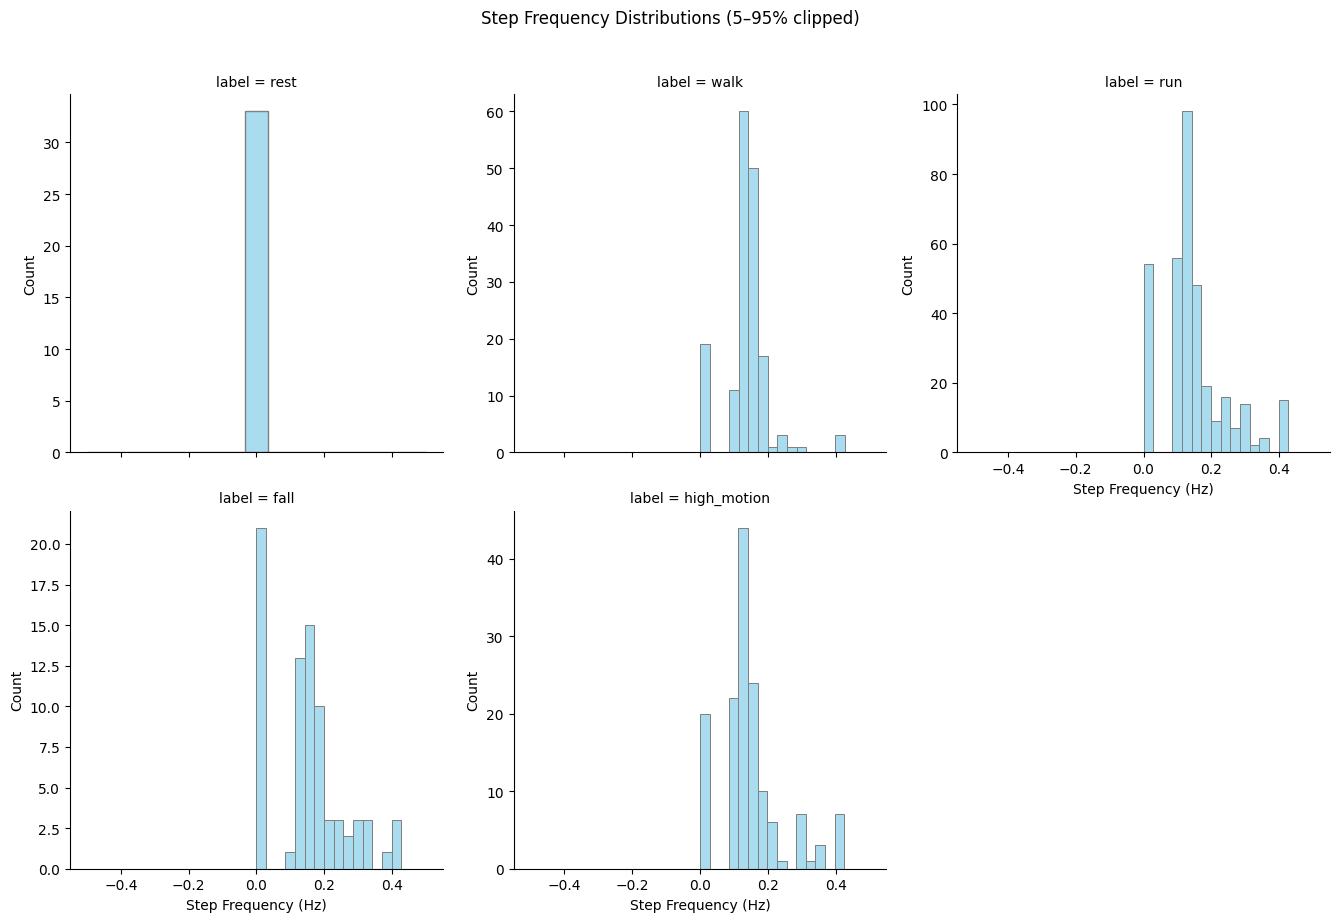

In [14]:
import pandas as pd                # for loading and handling the data
import matplotlib.pyplot as plt    # for creating plots
import seaborn as sns              # for nicer statistical plotting

# Load the CSV file into a table (DataFrame) called df
df = pd.read_csv('features_final_clean.csv')

# Find the 5th and 95th percentiles of the step‑frequency column
low, high = df['acc_step_freq'].quantile([0.05, 0.95])

# Keep only the rows where step‑frequency is between those percentiles
df_clip = df[(df['acc_step_freq'] >= low) & (df['acc_step_freq'] <= high)]

# Create a grid of subplots, one column per activity label
g = sns.FacetGrid(
    df_clip,         # the filtered data
    col='label',     # split plots by the activity type
    col_wrap=3,      # wrap to a new row after 3 plots
    height=4.5,      # make each plot taller (in inches)
    aspect=1,        # keep each plot roughly square
    sharex=True,     # use the same x‑axis scale for all plots
    sharey=False     # allow each plot its own y‑axis scale
)

# On each subplot, draw a histogram of the clipped step‑frequency
g.map(
    sns.histplot,    # the plotting function
    'acc_step_freq', # the column to plot
    bins=15,         # split the data into 15 bins
    color='skyblue', # fill bars with a light blue color
    edgecolor='gray',# draw a gray border around each bar
    alpha=0.7        # make bars slightly see‑through
)

# Label the axes on every subplot
for ax in g.axes.flatten():
    ax.set_xlabel('Step Frequency (Hz)')  # x‑axis label
    ax.set_ylabel('Count')                # y‑axis label

# Add a main title above all subplots
g.fig.suptitle('Step Frequency Distributions (5–95% clipped)', y=1.02)

# Adjust spacing so labels and titles don’t overlap
plt.tight_layout()

# Finally, display the complete figure
plt.show()


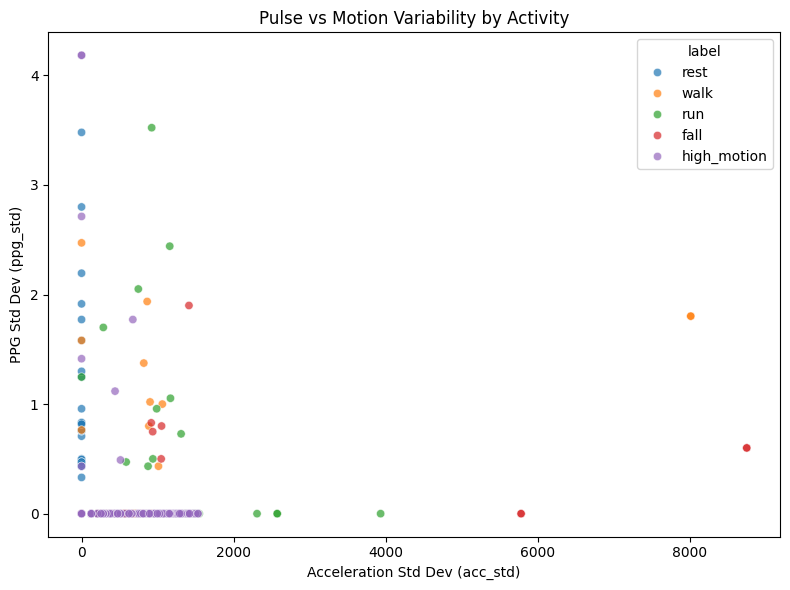

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('features_final_clean.csv')

# Create a scatter plot comparing pulse signal std vs. motion std
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='acc_std',        # Horizontal axis: motion variability
    y='ppg_std',        # Vertical axis: pulse variability
    hue='label',        # Color each point by activity type
    alpha=0.7           # Make points slightly transparent for better overlap visibility
)

# Add plot labels and title
plt.title('Pulse vs Motion Variability by Activity')
plt.xlabel('Acceleration Std Dev (acc_std)')
plt.ylabel('PPG Std Dev (ppg_std)')

# Clean layout
plt.tight_layout()
plt.show()


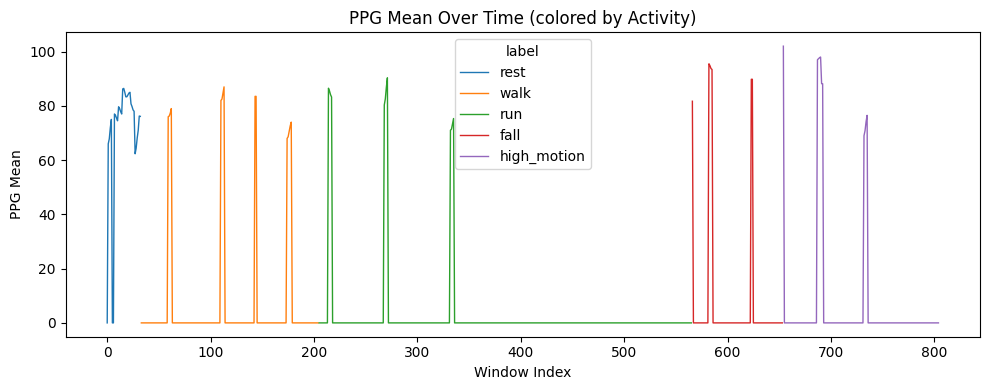

In [26]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, y='ppg_mean', x=df.index, hue='label', linewidth=1)
plt.title('PPG Mean Over Time (colored by Activity)')
plt.xlabel('Window Index')
plt.ylabel('PPG Mean')
plt.tight_layout()
plt.show()
